A importação das bibliotecas juntamente com o conjunto de dados utilizado foi realizado da seguinte maneira:

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

O conjunto de dados analisado foi encontrado através do repositório "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University". A exibição dos dados que o Google utiliza também é baseada no mesmo dataset:

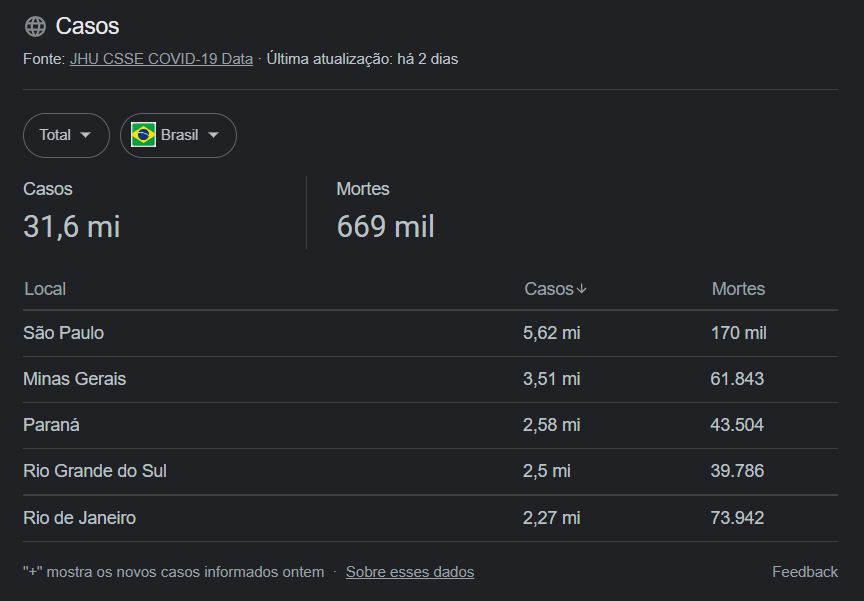

Dentro do repositório acima, podemos ver que a obtenção dos dados relacionados ao Brasil é realizada por Wesley Cota da Universidade federal de viçosa. O repositório dele pode ser encontrado a partir de : https://github.com/wcota/covid19br

In [91]:
!wget https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv   


--2022-06-20 19:31:20--  https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 3612683 (3,4M) [text/plain]
Salvando em: “cases-brazil-states.csv.5”

cases-brazil-states 100%[===================>]   3,45M  3,53MB/s    em 1,0s    

2022-06-20 19:31:21 (3,53 MB/s) - “cases-brazil-states.csv.5” salvo [3612683/3612683]



Podemos ver todas as colunas da base de dados a seguir:

In [92]:
data = pd.read_csv('./cases-brazil-states.csv',nrows = 0, sep=',')
data

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants


In [93]:
data.columns.values

array(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants'], dtype=object)

Podemos selecionar quais colunas queremos analisar:

In [94]:
cols = ['epi_week', 'date', 'country', 'state', 'city', 'newDeaths',
       'deaths', 'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'vaccinated',
       'vaccinated_per_100_inhabitants', 'vaccinated_second',
       'vaccinated_second_per_100_inhabitants', 'vaccinated_single',
       'vaccinated_single_per_100_inhabitants', 'vaccinated_third',
       'vaccinated_third_per_100_inhabitants']

In [116]:
cols = ['date','state','totalCases','vaccinated','vaccinated_single','vaccinated_second','vaccinated_third']

In [117]:
data = pd.read_csv('./cases-brazil-states.csv', usecols = ['state'], sep=',') 
data

,state
0,SP
1,TOTAL
2,SP
3,TOTAL
4,SP
...,...
23249,SC
23250,SE
23251,SP
23252,TO


In [118]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
data

,date,state,totalCases,vaccinated,vaccinated_second,vaccinated_single,vaccinated_third
0,2020-02-25,SP,1,NaN,NaN,NaN,NaN
1,2020-02-25,TOTAL,1,NaN,NaN,NaN,NaN
2,2020-02-26,SP,1,NaN,NaN,NaN,NaN
3,2020-02-26,TOTAL,1,NaN,NaN,NaN,NaN
4,2020-02-27,SP,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23249,2022-06-20,SC,1772876,6192029.0,5672915.0,277356.0,3018294.0
23250,2022-06-20,SE,328119,1968542.0,1786997.0,41643.0,999092.0
23251,2022-06-20,SP,5635140,42263513.0,39561467.0,1269321.0,31218389.0
23252,2022-06-20,TO,311721,1150415.0,979442.0,52175.0,395129.0


É possível observar um ruído nos dados anteriores, há a ocorrência de diversas linhas com o Estado de "TOTAL", que representa  o total de casos por dia, podemos retirá-las para conseguir identificar apenas os estados que possuem casos registrados por dia

In [119]:
data = pd.read_csv('./cases-brazil-states.csv',usecols = cols, sep=',')
filtro = data['state'] != 'TOTAL'
dataFiltred = data[filtro]
dataFiltred

,date,state,totalCases,vaccinated,vaccinated_second,vaccinated_single,vaccinated_third
0,2020-02-25,SP,1,NaN,NaN,NaN,NaN
2,2020-02-26,SP,1,NaN,NaN,NaN,NaN
4,2020-02-27,SP,1,NaN,NaN,NaN,NaN
6,2020-02-28,SP,2,NaN,NaN,NaN,NaN
8,2020-02-29,SP,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23248,2022-06-20,RS,2508890,9703613.0,9125494.0,324854.0,6101521.0
23249,2022-06-20,SC,1772876,6192029.0,5672915.0,277356.0,3018294.0
23250,2022-06-20,SE,328119,1968542.0,1786997.0,41643.0,999092.0
23251,2022-06-20,SP,5635140,42263513.0,39561467.0,1269321.0,31218389.0


Conseguimos identificar o tipo de cada campo

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23254 entries, 0 to 23253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        23254 non-null  object 
 1   state       23254 non-null  object 
 2   totalCases  23254 non-null  int64  
 3   vaccinated  14523 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 726.8+ KB


In [100]:
data.dtypes

date           object
state          object
totalCases      int64
vaccinated    float64
dtype: object

Conseguimos identificar todos os valores não preenchidos nas colunas

In [101]:
data.isna().sum()

date             0
state            0
totalCases       0
vaccinated    8731
dtype: int64

In [102]:
data.describe()

,totalCases,vaccinated
count,2.325400e+04,1.452300e+04
mean,1.031688e+06,8.093554e+06
std,3.313117e+06,2.449693e+07
min,1.000000e+00,2.000000e+00
25%,1.011208e+05,5.803160e+05
50%,2.921920e+05,2.317836e+06
75%,6.528388e+05,5.746803e+06
max,3.175446e+07,1.791462e+08


In [103]:
data['state'].value_counts()

TOTAL    847
SP       847
RJ       838
ES       837
BA       837
DF       836
AL       835
MG       835
RS       833
GO       831
SC       831
PR       831
PE       831
RN       831
AM       830
SE       829
MS       829
CE       827
AC       826
PA       825
PB       825
TO       825
PI       824
AP       823
MT       823
MA       823
RO       823
RR       822
Name: state, dtype: int64

In [135]:
data['year'] = pd.DatetimeIndex(data['date']).year

Podemos fitrar os numeros totais de casos ocorrido dentro de um período específico. Como por exemplo:

In [136]:
data_groupby = data.groupby('year')['totalCases'].sum()
data_groupby

year
2020     1784457032
2021    12414999752
2022     9791417106
Name: totalCases, dtype: int64

<AxesSubplot:title={'center':'Número total de casos de Covid por ano'}, xlabel='year'>

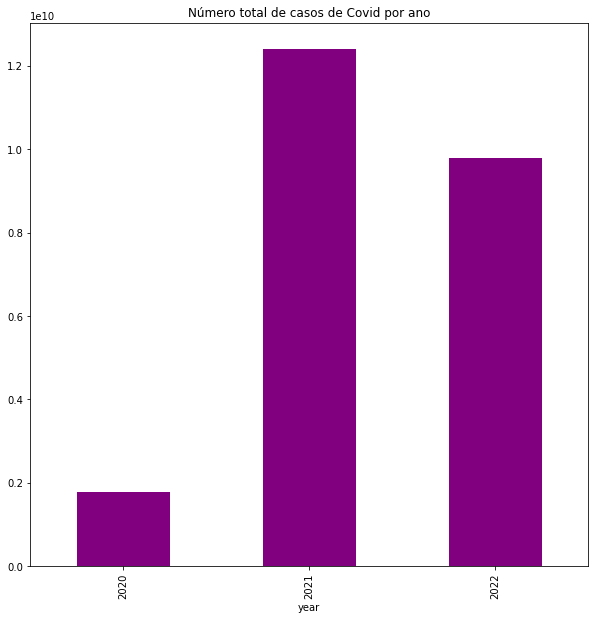

In [203]:
plt.figure(figsize=(10,10))
plt.title("Número total de casos de Covid por ano")
data_groupby.plot(kind='bar', x='date', y='totalCases', color='purple', label = 'totalCases')

## Relação entre vacinação e Estados

### Eliminando ruídos do dataset

In [153]:
data_without_nan_values = data.dropna()
data_without_nan_values

,date,state,totalCases,vaccinated,vaccinated_second,vaccinated_single,vaccinated_third,year
15089,2021-09-02,MS,369475,1836215.0,1053662.0,234861.0,282.0,2021
15105,2021-09-02,TOTAL,20834790,133236457.0,60244403.0,4661248.0,282.0,2021
15117,2021-09-03,MS,369733,1839113.0,1067906.0,234861.0,373.0,2021
15133,2021-09-03,TOTAL,20858394,133983801.0,61424341.0,4669260.0,373.0,2021
15145,2021-09-04,MS,369916,1844651.0,1075969.0,234871.0,537.0,2021
...,...,...,...,...,...,...,...,...
23249,2022-06-20,SC,1772876,6192029.0,5672915.0,277356.0,3018294.0,2022
23250,2022-06-20,SE,328119,1968542.0,1786997.0,41643.0,999092.0,2022
23251,2022-06-20,SP,5635140,42263513.0,39561467.0,1269321.0,31218389.0,2022
23252,2022-06-20,TO,311721,1150415.0,979442.0,52175.0,395129.0,2022


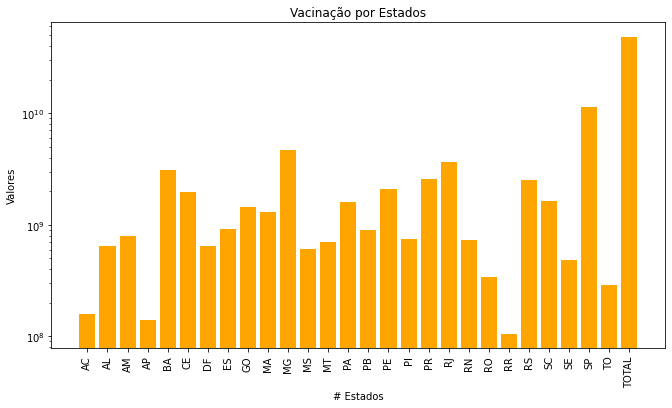

In [154]:
vaccinated_per_state = data_without_nan_values.groupby('state')['vaccinated'].sum()

plt.figure(figsize =(11, 6))
plt.bar(vaccinated_per_state.index, vaccinated_per_state.values, color = 'orange')
plt.ylabel("Valores")
plt.xlabel("# Estados")
plt.title("Vacinação por Estados")
plt.xticks(rotation='vertical')
plt.yscale('log')
plt.show()


## Analise de vacinação no estado de Minas Gerais

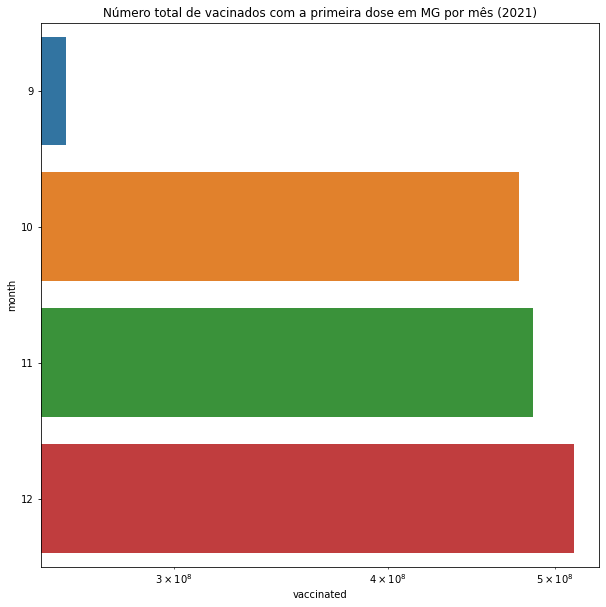

In [198]:
def total_vaccinated_per_year_by_state(state,year):
    data_with_month_column = data_without_nan_values.assign(month = pd.DatetimeIndex(data_without_nan_values['date']).month)
    total_vaccinated_per_month_in_mg = data_with_month_column[data_with_month_column['state'] == state]
    return total_vaccinated_per_month_in_mg[total_vaccinated_per_month_in_mg['year'] == year]


def mg_vaccinated(field,title):
    mg_2021_single = total_vaccinated_per_year_by_state("MG",2021).groupby('month')[field].sum().reset_index()
    plt.figure(figsize=(10,10))
    g=sns.barplot(data=mg_2021_single, y='month', x=field, orient='h')
    g.set_xscale('log')
    plt.title(title)
    plt.show()

mg_vaccinated('vaccinated',"Número total de vacinados com a primeira dose em MG por mês (2021)")

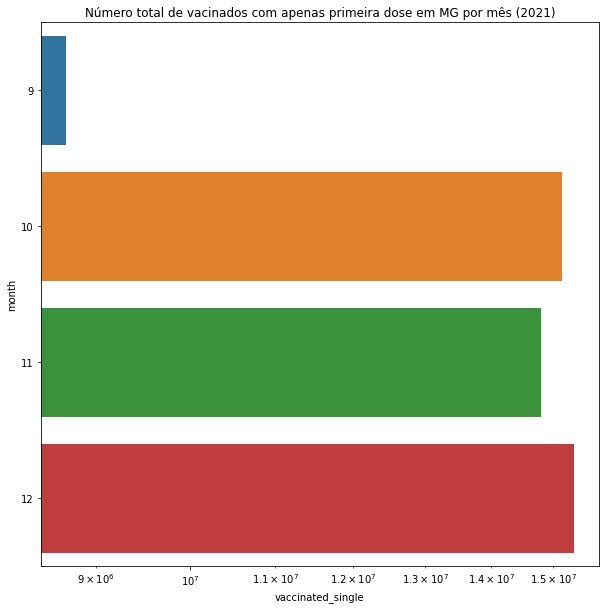

In [200]:
mg_vaccinated('vaccinated_single','Número total de vacinados com apenas primeira dose em MG por mês (2021)')

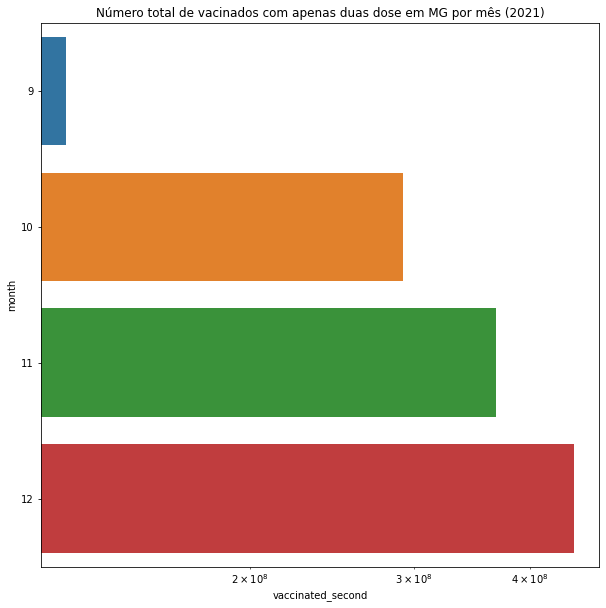

In [201]:
mg_vaccinated('vaccinated_second','Número total de vacinados com apenas duas dose em MG por mês (2021)')

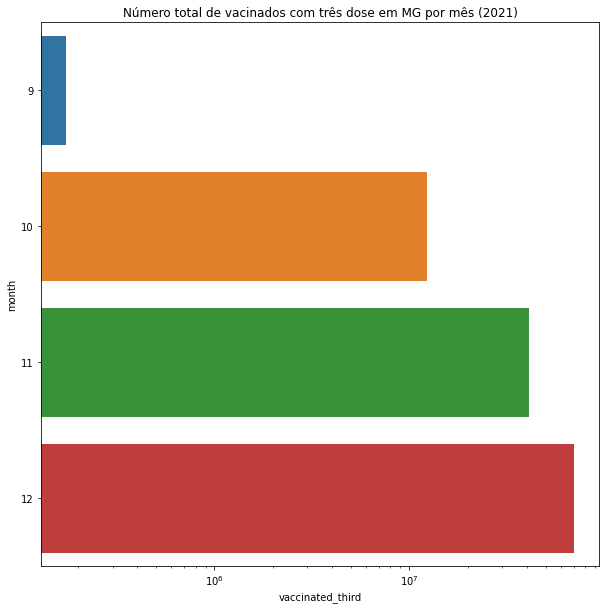

In [202]:
mg_vaccinated('vaccinated_third','Número total de vacinados com três dose em MG por mês (2021)')